![head.png](figures/head.jpg)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

In [43]:
# Packages used in this notebook
import requests
from bs4 import BeautifulSoup
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk

# Update package stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Web scraping

[Web scraping](https://en.wikipedia.org/wiki/Web_scraping) refers to the extraction of data from websites. It's a useful technique for building datasets, especially in situations where data isn't easily accessible via APIs or other direct methods. Before we begin, it's important to mention the ethical and legal considerations associated with web scraping. Always respect the rules of the site you're scraping, including the website's robots.txt file and terms of service.

Python provides several libraries to facilitate web scraping, such as [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/), [Scrapy](https://scrapy.org/), and [Requests](https://requests.readthedocs.io/en/latest/). In this class, we'll focus on using BeautifulSoup and Requests.

First, we need to send an HTTP request to the URL of the webpage you want to access. The server responds to the request by returning the HTML content of the webpage. For this task, we'll be using the requests library. The `requests.get()` function sends a GET request to the specified url. If the request is successful, the status code will be 200. You can check the status code by `response.status_code`.

Once we have accessed the HTML content, we are left with the task of parsing the data. Since most of the HTML data is nested, we cannot extract data simply through string processing. One needs a parser which can create a nested/tree structure of the HTML data. Let's try this out using news articles from [https://news.yahoo.com/tagged/climate-change/](https://news.yahoo.com/tagged/climate-change/):

In [44]:
# URL of the webpage we want to scrape data from
url = "https://news.yahoo.com/tagged/climate-change/"
# Sends a GET request to the URL to retrieve its content
response = requests.get(url)
assert response.status_code == 200
print(response.text)
# Parse results
soup = BeautifulSoup(response.text, 'html.parser')

<!DOCTYPE html><html id="atomic" class="NoJs featurephone" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><meta name="msapplication-TileColor" content="#6e329d"/><meta name="msapplication-TileImage" content="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_w_bestfit_frontpage.png"/><meta name="msvalidate.01" content="A9862C0E6E1BE95BCE0BF3D0298FD58B"/><meta name="referrer" content="unsafe-url"/><meta name="theme-color" content="#400090"/><meta name="twitter:dnt" content="on"/><meta name="twitter:site" content="@YahooNews"/><meta name="application-name" content="Yahoo News - Latest News &amp; Headlines"/><meta name="twitter:card" content="summary"/><meta name="apple-itunes-app" content="app-id=304158842"/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="twitter:description" content="Get the latest news, photos, videos, and more on Cli

Please note that some, more complex and dynamic, websites might require a more flexible query tools, such as [Selenium](https://selenium-python.readthedocs.io/). Selenium is an open-source framework commonly used for automating web browsers.

Now that we have created the soup, we can extract information. If you want to get a specific element of a page you can use the `soup.find_all` method, which returns all the instances of a tag on a page. Finding the right id can be tedious, a web browser that allows you to 'inspect' the page can be very helpful here.

In [45]:
# Find all the articles
articles = soup.find_all('p', class_='Fz(14px) Lh(19px) Fz(13px)--sm1024 Lh(17px)--sm1024 LineClamp(2,38px) LineClamp(2,34px)--sm1024 M(0)')
# Loop over each article in 'articles', extracts the text and appends it to 'raw_text
raw_text = ''
for article in articles:
    raw_text += article.text
print(raw_text)

The wildfire smoke that has gripped several U.S. cities and states this week may be a watershed moment when it comes to the growing realization that climate change is a significant problem.Two big risk factors for wildfires are excessive heat and drought, both of which are becoming more common due to climate change.With millions of East Coast residents now dealing with unhealthy air from wildfires in Canada, those of us who live in California and other parts of the West can offer some advice about how to stay safe and what to expect in the coming smoke-filled days.British actor Rowan Atkinson drew criticism over an article he wrote casting doubt on the wisdom of adopting electric vehicles.Insurance companies and state governments across the Sun Belt are trying to prepare for or prevent future disasters caused by climate change, and the housing market is being disrupted as a result.News outlets from Massachusetts to southeastern Pennsylvania are reporting that residents can smell smoke 

# Textual analysis (a very brief intro)

Textual analysis in financial economics involves using statistical, linguistic, and machine learning techniques to analyze text data such as financial reports, news articles, social media posts, and other written material to extract useful information for economic decision-making. Here are some common methods used:

1. Sentiment Analysis: This involves determining the tone or sentiment behind a piece of text. For instance, by analyzing the language used in financial news reports or earning call transcripts, attempt to quantify the sentiment in order to predict abnormal stock returns.

2. Bag of Words & TF-IDF: These methods convert text data into numerical representations that can be analyzed. Bag of Words involves representing text as a 'bag' of its words, disregarding grammar and word order but keeping a count of the frequency of words. TF-IDF (Term Frequency-Inverse Document Frequency) is a similar method that adjusts the word counts by the frequency of the word in the entire corpus, reducing the importance of very common words.

3. Topic Modeling: This involves identifying the key topics in a set of documents. One popular method is Latent Dirichlet Allocation (LDA), which assigns each word in a document to a topic, creating a probability distribution of topics for each document.

4. Named Entity Recognition (NER): This is a method used to extract specific information, such as the names of companies, people, or places from a text. In finance, this can be useful for understanding the companies being discussed in news articles or reports.

5. Word Embeddings: This method involves mapping words or phrases to vectors of real numbers. Techniques such as Word2Vec or GloVe are used, which can capture the semantic relationships between words, like similarity and analogies. In financial economics, these can be used to analyze the context around financial terms in text data.

7. Network Analysis: In financial economics, network analysis can be used to understand the relationships between different entities (like companies or countries) as mentioned in text data. This can help in understanding the influence of one entity over another or the spread of financial risks in a network.

6. Deep Learning Models: With the advent of deep learning, various models like Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, and Transformers (like BERT, GPT) have been used to analyze textual data in financial economics. These models can handle large amounts of text and capture long-term dependencies in the text, providing a deeper understanding of the financial language.

These techniques can be combined in various ways to create more sophisticated methods that cater to the specific problem at hand. 

## Regular expression (regex)

Not as fancy as some of the methods described above, however, part of (almost) every textual analysis: regular expressions (regex) are a powerful tool in computing used for pattern matching and manipulation of text strings. They provide a flexible and concise means to match, locate, and manage text.

A regular expression is a sequence of characters that forms a search pattern. This pattern can be used in a search operation to find a match or to replace text. The pattern can be a simple string, or it can be a more complex pattern that uses special characters to find a broader range of matches.

Here are some of the common special characters and sequences used in regular expressions:

* '.': Matches any single character except newline
* '*': Matches zero or more occurrences of the preceding character or group
* '+': Matches one or more occurrences of the preceding character or group
* '?': Matches zero or one occurrence of the preceding character or group
* '^': Matches the start of a line
* '$': Matches the end of a line
* '[abc]': Matches any character a, b, or c
* '(abc)': Matches the group of characters 'abc'
* '\d': Matches any digit, equivalent to [0-9]
* '\D': Matches any non-digit character
* '\w': Matches any alphanumeric character or underscore, equivalent to [A-Za-z0-9_]
* '\W': Matches any non-alphanumeric character
* '\s': Matches any whitespace character
* '\S': Matches any non-whitespace character

These are just a few examples, and different languages and tools can have additional features or syntax in their regular expression engines.

A very helpful tool fpr designing regular expressions is [https://regex101.com/](https://regex101.com/)

In [46]:
# Regex to remove all non-alphabetical characters and replace them with a space
processed_text = re.sub('[^a-zA-Z]', ' ', raw_text)
# Convert all characters to lowercase 
processed_text = processed_text.lower()
# Split the text into individual words
processed_text = processed_text.split()

# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
processed_text = [word for word in processed_text if word not in stop_words]

print(processed_text)

['wildfire', 'smoke', 'gripped', 'several', 'u', 'cities', 'states', 'week', 'may', 'watershed', 'moment', 'comes', 'growing', 'realization', 'climate', 'change', 'significant', 'problem', 'two', 'big', 'risk', 'factors', 'wildfires', 'excessive', 'heat', 'drought', 'becoming', 'common', 'due', 'climate', 'change', 'millions', 'east', 'coast', 'residents', 'dealing', 'unhealthy', 'air', 'wildfires', 'canada', 'us', 'live', 'california', 'parts', 'west', 'offer', 'advice', 'stay', 'safe', 'expect', 'coming', 'smoke', 'filled', 'days', 'british', 'actor', 'rowan', 'atkinson', 'drew', 'criticism', 'article', 'wrote', 'casting', 'doubt', 'wisdom', 'adopting', 'electric', 'vehicles', 'insurance', 'companies', 'state', 'governments', 'across', 'sun', 'belt', 'trying', 'prepare', 'prevent', 'future', 'disasters', 'caused', 'climate', 'change', 'housing', 'market', 'disrupted', 'result', 'news', 'outlets', 'massachusetts', 'southeastern', 'pennsylvania', 'reporting', 'residents', 'smell', 'smo

Counter({'climate': 16, 'change': 13, 'gas': 5, 'news': 4, 'proposal': 4, 'emissions': 4, 'smoke': 3, 'u': 3, 'states': 3, 'residents': 3, 'california': 3, 'electric': 3, 'governments': 3, 'house': 3, 'wednesday': 3, 'would': 3, 'carbon': 3, 'far': 3, 'told': 3, 'yahoo': 3, 'envoy': 3, 'cities': 2, 'week': 2, 'may': 2, 'risk': 2, 'wildfires': 2, 'heat': 2, 'millions': 2, 'coast': 2, 'air': 2, 'across': 2, 'trying': 2, 'prevent': 2, 'southeastern': 2, 'experts': 2, 'quality': 2, 'proposed': 2, 'energy': 2, 'regulation': 2, 'require': 2, 'new': 2, 'reduce': 2, 'use': 2, 'years': 2, 'power': 2, 'plants': 2, 'conservatives': 2, 'going': 2, 'largest': 2, 'history': 2, 'unveiled': 2, 'reduction': 2, 'legal': 2, 'federal': 2, 'budget': 2, 'order': 2, 'last': 2, 'republican': 2, 'since': 2, 'temperatures': 2, 'united': 2, 'americans': 2, 'world': 2, 'president': 2, 'special': 2, 'biden': 2, 'china': 2, 'john': 2, 'kerry': 2, 'wildfire': 1, 'gripped': 1, 'several': 1, 'watershed': 1, 'moment': 

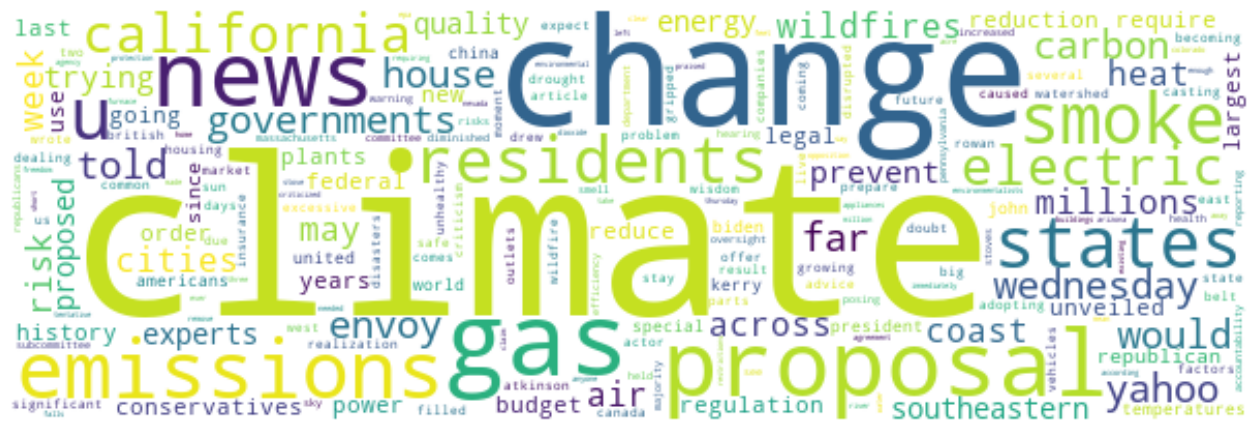

In [47]:
# Counts the frequency of each word in 'processed_text'
word_frequency = collections.Counter(processed_text)
print(word_frequency)

# Generates a Word Cloud image from the word frequencies
wc = WordCloud(width=600, height=200, max_words=200, background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Non-Answers

See: https://github.com/cafawo/FinancialDataAnalytics/blob/master/nonanswers.pdf